In [14]:
import pandas as pd 

In [15]:
df = pd.read_csv("D:/Python ETLHive/IPL_Dataset.csv")
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

<Axes: >

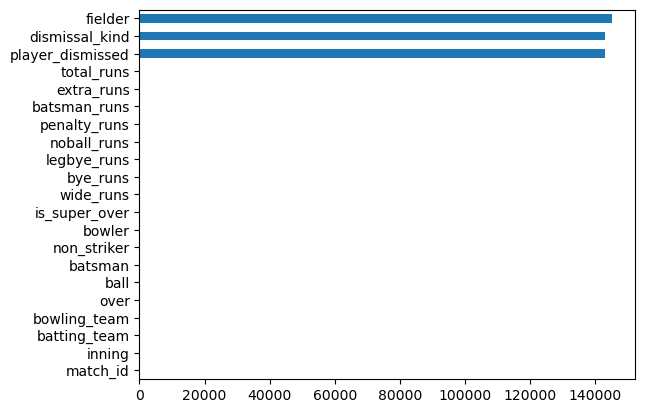

In [16]:
# Replace null values
df.isnull().sum().plot(kind='barh')

In [17]:
# 1.What is the total number of runs scored by each batting team? 
df.groupby(by ='batting_team')['total_runs'].sum()

batting_team
Chennai Super Kings            20899
Deccan Chargers                11463
Delhi Daredevils               21953
Gujarat Lions                   4862
Kings XI Punjab                23068
Kochi Tuskers Kerala            1901
Kolkata Knight Riders          21965
Mumbai Indians                 24521
Pune Warriors                   6358
Rajasthan Royals               17703
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Royal Challengers Bangalore    23436
Sunrisers Hyderabad            11652
Name: total_runs, dtype: int64

In [18]:
# 2. How many wides have been bowled by each bowling team? 
df.groupby(by ='bowling_team')['wide_runs'].sum()

bowling_team
Chennai Super Kings            526
Deccan Chargers                328
Delhi Daredevils               614
Gujarat Lions                  107
Kings XI Punjab                668
Kochi Tuskers Kerala            56
Kolkata Knight Riders          658
Mumbai Indians                 786
Pune Warriors                  174
Rajasthan Royals               586
Rising Pune Supergiant          69
Rising Pune Supergiants         77
Royal Challengers Bangalore    725
Sunrisers Hyderabad            268
Name: wide_runs, dtype: int64

In [19]:
# 3. What is the average number of runs scored per inning by each team?
df.groupby(by ='batting_team')['total_runs'].mean().reset_index()

,batting_team,total_runs
0,Chennai Super Kings,1.326584
1,Deccan Chargers,1.268873
2,Delhi Daredevils,1.277451
3,Gujarat Lions,1.363432
4,Kings XI Punjab,1.311129
5,Kochi Tuskers Kerala,1.201643
6,Kolkata Knight Riders,1.274885
7,Mumbai Indians,1.294462
8,Pune Warriors,1.168106
9,Rajasthan Royals,1.272316


In [20]:
# 4.Which batsman has scored the highest number of runs? 
max_runs_batsman = df.groupby(by='batsman')['batsman_runs'].sum().sort_values(ascending= False).head(1)
print(max_runs_batsman)

batsman
SK Raina    4548
Name: batsman_runs, dtype: int64


In [21]:
# 5. How many dismissals have occurred of each dismissal kind
df.groupby(by ='dismissal_kind')['inning'].sum().sort_values(ascending=False)

dismissal_kind
caught                   6482
bowled                   2067
run out                  1078
lbw                       682
stumped                   373
caught and bowled         317
retired hurt               13
hit wicket                 12
obstructing the field       2
Name: inning, dtype: int64

In [22]:
 # 6. What is the total runs scored in each over? 
df.groupby(by='over')['total_runs'].sum().sort_values(ascending=False)

over
18    10899
17    10817
19    10469
6     10397
16    10397
15    10240
5     10227
4     10207
14     9900
3      9852
13     9713
12     9694
20     9647
11     9456
9      9247
10     9047
2      8993
8      8966
7      8413
1      7733
Name: total_runs, dtype: int64

In [23]:
 # 7. Which bowler has taken the most wickets?
df.groupby(by = 'bowler')['player_dismissed'].count().sort_values(ascending=False).head(1)

bowler
SL Malinga    170
Name: player_dismissed, dtype: int64

In [24]:
# 8. How many super overs have been played in total?
a = df['is_super_over'].sum()
print(f'Total  super overs played are  {a}')

Total  super overs played are  81


In [25]:
 # 9. What is the average number of extras (wide runs, bye runs, legbye runs, noball runs, penalty runs) conceded per inning by each bowling team?
df['total_extras'] = df['wide_runs']+df['noball_runs']+df['penalty_runs']+df['bye_runs']+df['legbye_runs']
extras_per_inning= df.groupby(by='bowling_team')['total_extras'].mean().reset_index
extras_per_inning

<bound method Series.reset_index of bowling_team
Chennai Super Kings            0.064388
Deccan Chargers                0.072906
Delhi Daredevils               0.069419
Gujarat Lions                  0.053032
Kings XI Punjab                0.070722
Kochi Tuskers Kerala           0.068154
Kolkata Knight Riders          0.069152
Mumbai Indians                 0.073998
Pune Warriors                  0.061389
Rajasthan Royals               0.074977
Rising Pune Supergiant         0.057573
Rising Pune Supergiants        0.066873
Royal Challengers Bangalore    0.073047
Sunrisers Hyderabad            0.054793
Name: total_extras, dtype: float64>

In [26]:
#10.How many runs have been scored by each batsman-bowler pair?
df.groupby(by=['batsman','bowler'])['total_runs'].sum().sort_values(ascending=False)

batsman       bowler         
V Kohli       A Mishra           156
SK Raina      PP Chawla          153
V Kohli       UT Yadav           144
DA Warner     P Kumar            141
SK Raina      Harbhajan Singh    138
                                ... 
AM Rahane     D du Preez           0
RG Sharma     K Rabada             0
DB Ravi Teja  Umar Gul             0
J Theron      P Kumar              0
BAW Mendis    SL Malinga           0
Name: total_runs, Length: 17151, dtype: int64

In [27]:
#11. What is the most common dismissal kind?
df['dismissal_kind'].value_counts().sort_values(ascending=False).head(1)

dismissal_kind
caught    4373
Name: count, dtype: int64

In [28]:
# 12. How many matches have been played by each batting team? 
df.groupby(by='batting_team')['match_id'].nunique()

batting_team
Chennai Super Kings            131
Deccan Chargers                 75
Delhi Daredevils               147
Gujarat Lions                   30
Kings XI Punjab                148
Kochi Tuskers Kerala            14
Kolkata Knight Riders          148
Mumbai Indians                 157
Pune Warriors                   45
Rajasthan Royals               117
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    152
Sunrisers Hyderabad             76
Name: match_id, dtype: int64

In [29]:
# 13. What is the average number of runs scored in each over?
avg_runs_scored_per_over= df.groupby(by='over')['total_runs'].mean().sort_values(ascending=False)
avg_runs_scored_per_over

over
20    1.707736
19    1.600031
18    1.561685
17    1.495300
16    1.418031
15    1.373206
6     1.321933
14    1.313694
5     1.298832
4     1.291698
13    1.275509
12    1.269347
3     1.242057
11    1.233177
9     1.189325
10    1.170981
8     1.149635
2     1.121601
7     1.074869
1     0.955635
Name: total_runs, dtype: float64

In [30]:
# 14. Which fielder has been involved in the most dismissals?
df['fielder'].value_counts().head(1)

fielder
KD Karthik    127
Name: count, dtype: int64

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

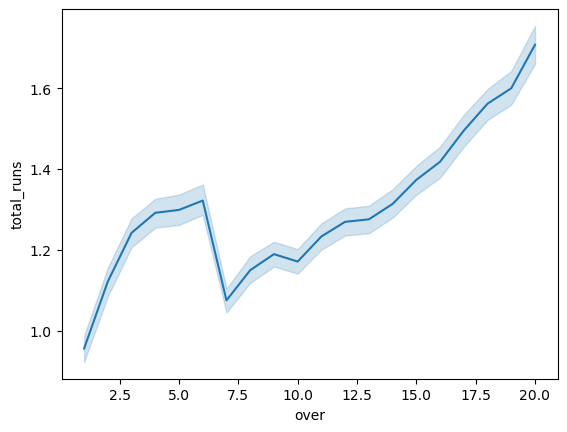

<Figure size 1000x1000 with 0 Axes>

In [31]:
# 15. How does the number of runs scored vary with the over number? 
import  seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data = df,x='over',y='total_runs')
plt.figure(figsize=(10,10))

In [32]:
# 16. how is the relationship between the number of runs scored and the number of extras conceded? 
df[['extra_runs','total_runs']].corr()

,extra_runs,total_runs
extra_runs,1.000000,0.078085
total_runs,0.078085,1.000000


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='batting_team', ylabel='inning'>

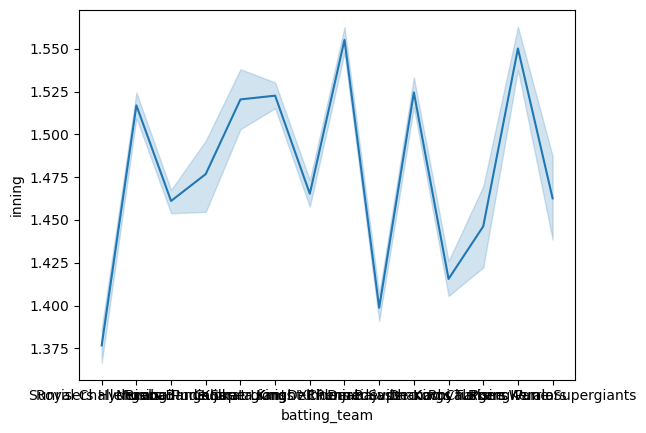

In [33]:
# 17. Are there any notable trends in the distribution of runs scored by batting teams across innings? 
df['batting_team_head']=df['batting_team'].iloc[:50]
sns.lineplot(data=df,x='batting_team',y='inning')

In [34]:
# 18. Which batting team has the highest average runs per match?
highest_avg_runs_per_match=df.groupby(by='batting_team')['total_runs'].mean().head(1)
highest_avg_runs_per_match

batting_team
Chennai Super Kings    1.326584
Name: total_runs, dtype: float64

In [35]:
# 19. What is the total runs scored by each batsman?
total_runs_per_batsman=df.groupby(by='batsman')['total_runs'].sum().sort_values(ascending=False)
total_runs_per_batsman

batsman
SK Raina          4745
V Kohli           4588
G Gambhir         4388
RG Sharma         4334
DA Warner         4213
                  ... 
IC Pandey            0
U Kaul               0
V Pratap Singh       0
Sunny Gupta          0
RR Bhatkal           0
Name: total_runs, Length: 461, dtype: int64

In [36]:
# 20. How does the average number of runs scored per inning vary across different bowling teams?
avg_runs_per_inning=df.groupby(by='bowling_team')['total_runs'].mean().sort_values(ascending=False)
avg_runs_per_inning

bowling_team
Gujarat Lions                  1.435825
Kings XI Punjab                1.337971
Royal Challengers Bangalore    1.318192
Rising Pune Supergiants        1.308359
Delhi Daredevils               1.306685
Sunrisers Hyderabad            1.289941
Deccan Chargers                1.285319
Chennai Super Kings            1.271687
Kolkata Knight Riders          1.265579
Rajasthan Royals               1.265254
Rising Pune Supergiant         1.263485
Mumbai Indians                 1.262514
Pune Warriors                  1.256551
Kochi Tuskers Kerala           1.230483
Name: total_runs, dtype: float64

In [37]:
# 21. how is the relationship between the number of wides and the number of no balls bowled?
df[['wide_runs','noball_runs']].corr()

,wide_runs,noball_runs
wide_runs,1.000000,-0.008703
noball_runs,-0.008703,1.000000


In [38]:
#  22. Which batting team has the highest number of centuries?
df['centuries']=df['batsman_runs']>99
df.groupby('batting_team')['centuries'].sum()

batting_team
Chennai Super Kings            0
Deccan Chargers                0
Delhi Daredevils               0
Gujarat Lions                  0
Kings XI Punjab                0
Kochi Tuskers Kerala           0
Kolkata Knight Riders          0
Mumbai Indians                 0
Pune Warriors                  0
Rajasthan Royals               0
Rising Pune Supergiant         0
Rising Pune Supergiants        0
Royal Challengers Bangalore    0
Sunrisers Hyderabad            0
Name: centuries, dtype: int64

In [39]:
 # 23. How does the number of wides vary with the over number?
df[['wide_runs','over']].corr()

,wide_runs,over
wide_runs,1.000000,-0.016226
over,-0.016226,1.000000


In [40]:
# # 24. What is the average number of runs scored per inning in matches with a super over?
df[df['is_super_over']==1]['total_runs'].mean()

2.1358024691358026

In [41]:
# # 25. How does the number of extras vary with the over number? 
df[['total_extras','over']].corr()

,total_extras,over
total_extras,1.000000,-0.007649
over,-0.007649,1.000000


In [42]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'total_extras', 'batting_team_head',
       'centuries'],
      dtype='object')

In [43]:
 # 26. Which bowler has the highest economy rate?
bowler_stats = df.groupby(by='bowler').agg({
    'over': 'sum',
    'total_runs': 'sum'
})


bowler_stats['Economy_Rate'] = bowler_stats['over'] / bowler_stats['total_runs']
highest_economy_bowler = bowler_stats['Economy_Rate'].idxmax()
print(f"The bowler with the highest economy rate is {highest_economy_bowler}")

The bowler with the highest economy rate is AC Gilchrist


In [44]:
 # 27. How does the number of dismissals vary across different dismissal kinds?
df.groupby(by='dismissal_kind')['dismissal_kind'].count().sort_values(ascending=False)

dismissal_kind
caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
hit wicket                  9
retired hurt                9
obstructing the field       1
Name: dismissal_kind, dtype: int64

Text(0.5, 1.0, 'Distribution of Runs Scored by Each Batting Team in Super Overs')

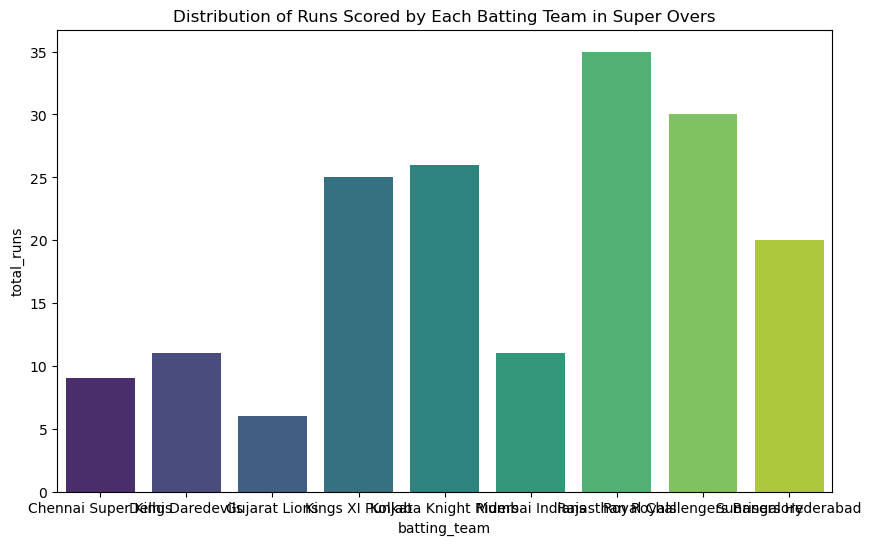

In [45]:
# 28. What is the distribution of runs scored by each batting team in super overs?
import matplotlib.pyplot as plt
super_over_df = df[df['is_super_over'] == 1]  
runs_by_team = super_over_df.groupby('batting_team')['total_runs'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='batting_team', y='total_runs', data=runs_by_team, palette='viridis')
plt.title('Distribution of Runs Scored by Each Batting Team in Super Overs')